## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#specify the value of the precision parameter equal to 3 to display three decimal signs
pd.set_option("precision", 3)
pd.options.display.float_format = '{:.3f}'.format

# Explore Datasets 

In [3]:
df = pd.read_excel('Credit_card.xlsx')
df.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [4]:
#dataset size, feature names and their types
df.shape


(30000, 25)

In [5]:
#Output the column (feature) names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,...,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,...,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [8]:
df["default payment next month"].value_counts(normalize = True)

0   0.779
1   0.221
Name: default payment next month, dtype: float64

In [9]:
df["MARRIAGE"].value_counts(normalize = True)

2   0.532
1   0.455
3   0.011
0   0.002
Name: MARRIAGE, dtype: float64

In [10]:
df=df.drop(['ID'], axis=1)

# Counting unique value

In [11]:
from numpy import unique

counts = df.nunique() 
for_delete = [i for i,v in enumerate(counts) if v == 1]
if for_delete == []:
  print('Numbers of the useless columns are: empty (it means all our columns are useful).')
else:
  print('Numbers of the useless columns are:', for_delete)
df.drop(for_delete, axis = 1, inplace = True)
print('\nDimensionalities of our dataset after dropping are:', '\n', 'objects (clients) = ', '\t', '\t', df.shape[0],
      '\n', 'features (column names) = ', '\t', df.shape[1])
if (df.shape[0] == 30000) and (df.shape[1] == 24):
  print('\nThus, dimensionalities of our dataset after the dropping process have not changed.\n')
print("Numbers (Nr) of unique values (UV) for each column and its percent (%):\n")
print('Nr \t UV \t %')
print('======================')
for i in range(df.shape[1]):
    num = len(unique(df.iloc[:, i]))
    percentage = float(num) / df.shape[0] * 100
    print('%d\t %d\t %.1f' % (i, num, percentage))
print('======================')

Numbers of the useless columns are: empty (it means all our columns are useful).

Dimensionalities of our dataset after dropping are: 
 objects (clients) =  	 	 30000 
 features (column names) =  	 24

Thus, dimensionalities of our dataset after the dropping process have not changed.

Numbers (Nr) of unique values (UV) for each column and its percent (%):

Nr 	 UV 	 %
0	 81	 0.3
1	 2	 0.0
2	 7	 0.0
3	 4	 0.0
4	 56	 0.2
5	 11	 0.0
6	 11	 0.0
7	 11	 0.0
8	 11	 0.0
9	 10	 0.0
10	 10	 0.0
11	 22723	 75.7
12	 22346	 74.5
13	 22026	 73.4
14	 21548	 71.8
15	 21010	 70.0
16	 20604	 68.7
17	 7943	 26.5
18	 7899	 26.3
19	 7518	 25.1
20	 6937	 23.1
21	 6897	 23.0
22	 6939	 23.1
23	 2	 0.0


# Measure Correlation between Variables

In [12]:
df.corr().style.background_gradient(cmap = 'magma')
#Note:
#**-1 indicates a perfect negative linear correlation**
#**0 indicates no linear correlation**
#**1 indicates a perfect positive linear correlation**

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000,0.025,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,-0.235,0.285,0.278,0.283,0.294,0.296,0.290,0.195,0.178,0.210,0.203,0.217,0.220,-0.154
SEX,0.025,1.000,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.060,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.000,-0.001,-0.009,-0.002,-0.002,-0.003,-0.040
EDUCATION,-0.219,0.014,1.000,-0.143,0.175,0.105,0.122,0.114,0.109,0.098,0.082,0.024,0.019,0.013,-0.000,-0.008,-0.009,-0.037,-0.030,-0.040,-0.038,-0.040,-0.037,0.028
MARRIAGE,-0.108,-0.031,-0.143,1.000,-0.414,0.020,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.008,-0.004,-0.013,-0.001,-0.007,-0.024
AGE,0.145,-0.091,0.175,-0.414,1.000,-0.039,-0.050,-0.053,-0.050,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014
PAY_0,-0.271,-0.058,0.105,0.020,-0.039,1.000,0.672,0.574,0.539,0.509,0.475,0.187,0.190,0.180,0.179,0.181,0.177,-0.079,-0.070,-0.071,-0.064,-0.058,-0.059,0.325
PAY_2,-0.296,-0.071,0.122,0.024,-0.050,0.672,1.000,0.767,0.662,0.623,0.576,0.235,0.235,0.224,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.264
PAY_3,-0.286,-0.066,0.114,0.033,-0.053,0.574,0.767,1.000,0.777,0.687,0.633,0.208,0.237,0.227,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.046,-0.036,-0.036,0.235
PAY_4,-0.267,-0.060,0.109,0.033,-0.050,0.539,0.662,0.777,1.000,0.820,0.716,0.203,0.226,0.245,0.246,0.243,0.239,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027,0.217
PAY_5,-0.249,-0.055,0.098,0.036,-0.054,0.509,0.623,0.687,0.820,1.000,0.817,0.207,0.227,0.243,0.272,0.270,0.263,-0.006,-0.003,0.009,-0.058,-0.033,-0.023,0.204


In [13]:
# Decrease the size of a table by using necessary columns
df_example = pd.DataFrame(df, columns=df.columns.tolist()[0:6])
df_example.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0
0,20000,2,2,1,24,2
1,120000,2,2,2,26,-1
2,90000,2,2,2,34,0
3,50000,2,2,1,37,0
4,50000,1,2,1,57,-1


In [14]:
# Decrease our dataset based on unique values defined earlier and use only values which are higher or equal 20%
df_unique = pd.DataFrame(df, columns = df.columns.tolist()[11:23])
df_unique.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Text(0.5, 1.0, 'Correlation Matrix df_unique\n\n')

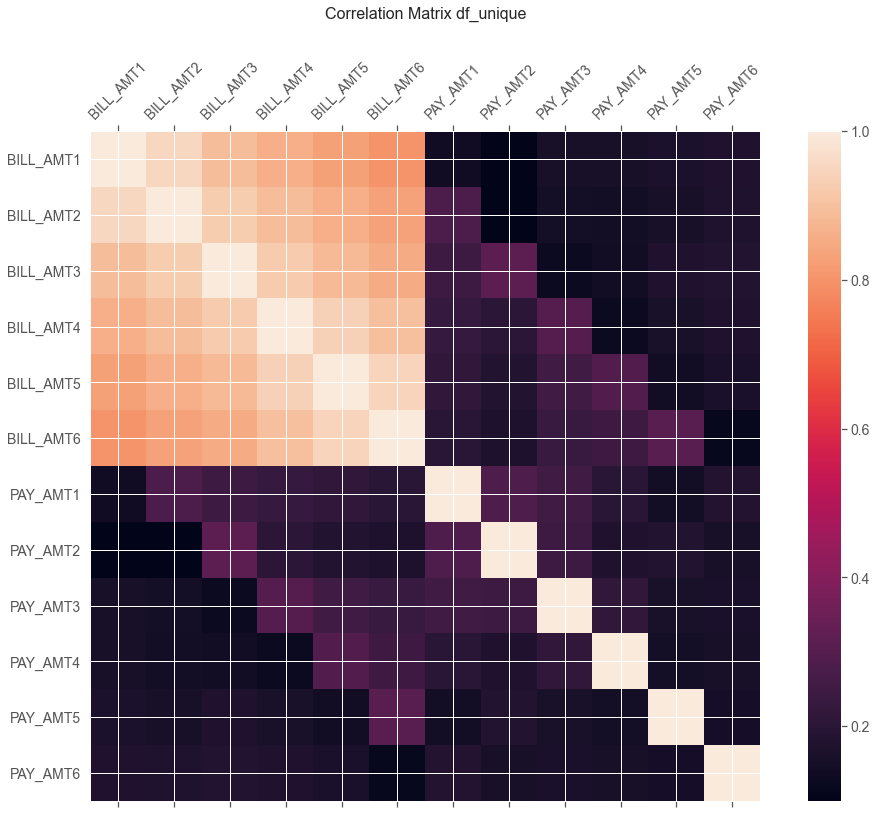

In [15]:
f = plt.figure(figsize=(17, 12))
plt.matshow(df_unique.corr(), fignum=f.number)
plt.xticks(range(df_unique.shape[1]), df_unique.columns, fontsize=14, rotation=45)
plt.yticks(range(df_unique.shape[1]), df_unique.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix df_unique\n\n', fontsize=16)

# Studying separate dependencies of variables pairs

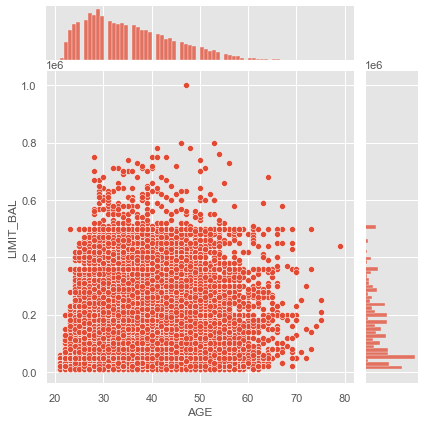

In [16]:
df_ALB = pd.DataFrame(df, columns=['LIMIT_BAL','AGE'])
sns.jointplot(x='AGE', y='LIMIT_BAL', data = df_ALB)

# Indexing and Extracting Data

In [17]:
print("Part of clients =", '{:.2%}'.format(df["default payment next month"].mean()))

Part of clients = 22.12%


In [18]:
df[df["default payment next month"] == 1].mean()
#mean values of numerical features

LIMIT_BAL                    130109.656
SEX                               1.567
EDUCATION                         1.895
MARRIAGE                          1.528
AGE                              35.726
PAY_0                             0.668
PAY_2                             0.458
PAY_3                             0.362
PAY_4                             0.255
PAY_5                             0.168
PAY_6                             0.112
BILL_AMT1                     48509.162
BILL_AMT2                     47283.618
BILL_AMT3                     45181.599
BILL_AMT4                     42036.951
BILL_AMT5                     39540.190
BILL_AMT6                     38271.436
PAY_AMT1                       3397.044
PAY_AMT2                       3388.650
PAY_AMT3                       3367.352
PAY_AMT4                       3155.627
PAY_AMT5                       3219.140
PAY_AMT6                       3441.482
default payment next month        1.000
dtype: float64

In [19]:
# average repayment status (ars) in September 2005 for a typical client 
ars = round(df[df["default payment next month"] == 1]["PAY_2"].mean(), 2) * 100
print("Average repayment status, which was in September, 2005 for the typical client =", ars, "%")

Average repayment status, which was in September, 2005 for the typical client = 46.0 %


In [20]:
pd = round(((df["default payment next month"] == 1).sum() & df["PAY_0"].value_counts()[-1]) / df.shape[0], 3)*100
print("Part of clients =", pd, "%")

Part of clients = 13.8 %


# Dataset Visualization

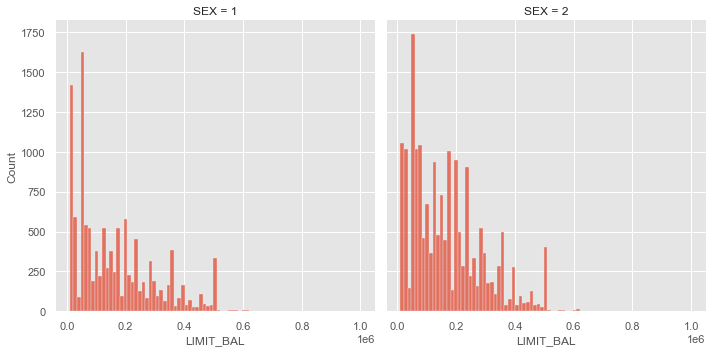

In [21]:
# distribution of the feature LIMIT_BAL for both values of the variable SEX (1= male and 2 = female)
sns.displot(df, x = "LIMIT_BAL", col = "SEX", multiple = "dodge")

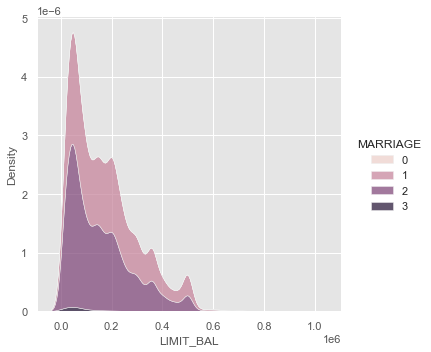

In [22]:
# distribution (density in our case) of the feature LIMIT_BAL for all four values of the variable MARRIAGE (1 = married; 2 = single; 3 = others) with the help of the parameter hue
sns.displot(df, x = "LIMIT_BAL", hue = "MARRIAGE", kind = "kde", multiple = "stack")

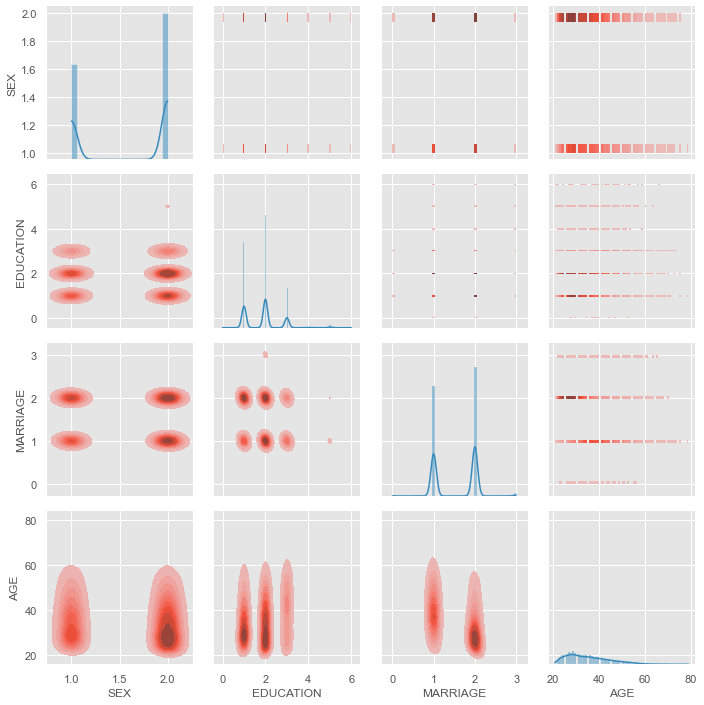

In [23]:
g = sns.PairGrid(df[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

<AxesSubplot:>

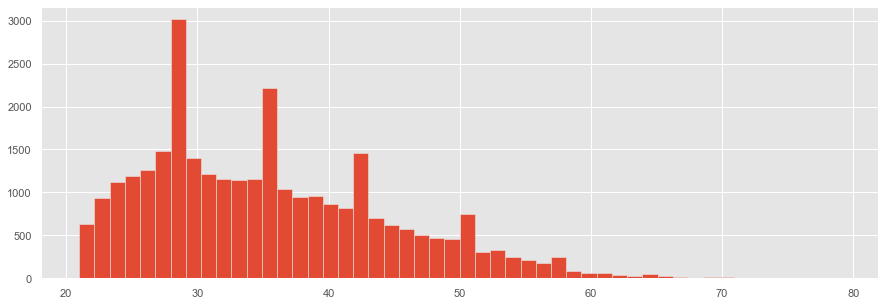

In [24]:
df["AGE"].hist(bins = 50)

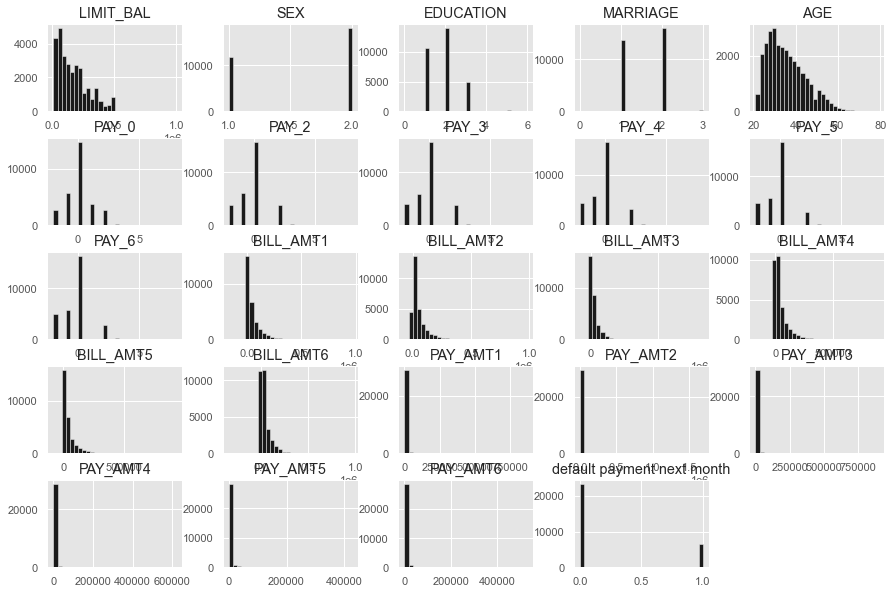

In [25]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

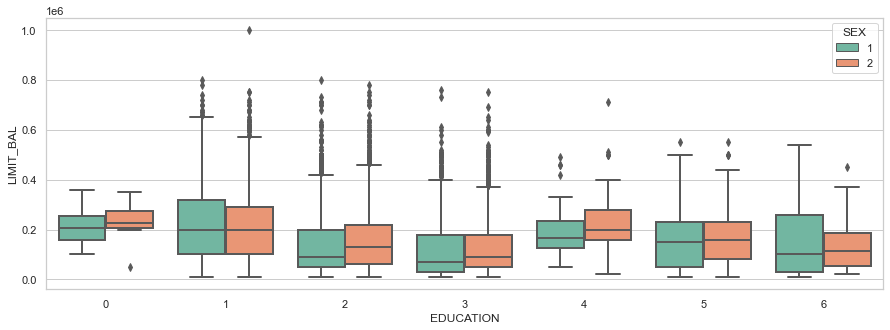

In [26]:
#boxplot
sns.set_theme(style = "whitegrid")
sns.boxplot(x = "EDUCATION",
                 y = "LIMIT_BAL",
                 hue = "SEX",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set2")

<AxesSubplot:xlabel='MARRIAGE', ylabel='AGE'>

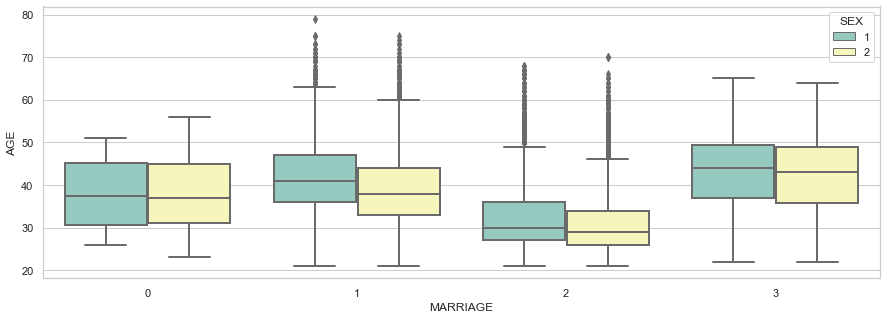

In [27]:
sns.boxplot(x = "MARRIAGE",
                 y = "AGE",
                 hue = "SEX",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set3")

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

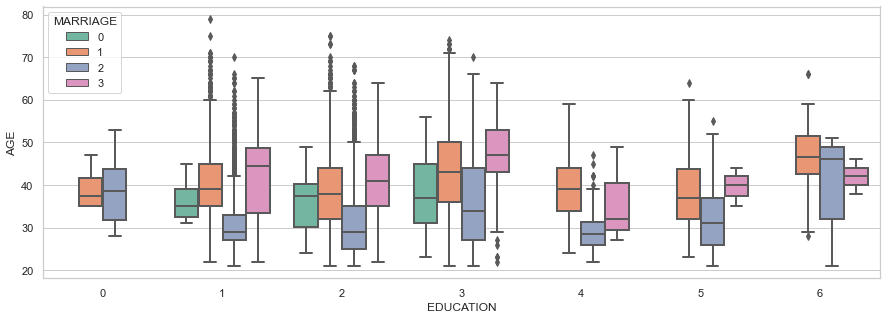

In [28]:
sns.boxplot(x = "EDUCATION",
                 y = "AGE",
                 hue = "MARRIAGE",
                 data = df,
                 linewidth = 2.0,
                 dodge = True,
                 palette = "Set2")